In [56]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

label_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans', 'Tahoma']

%config InlineBackend.figure_format = 'svg' # figuras alta calidad jupyter

### Implentación del metodo de Heun para el péndulo simple

In [94]:
# Parámetros
N = 1000             # número de pasos
t0 = 0              # tiempo inicial en segundos
T = 120              # tiempo final en segundos
dt = (T-t0)/(N-1)   # paso de tiempo
g = 9.8             # aceleración de gravedad
L = 1               # largo del péndulo

# Comentario sobre mejor dt
#n = 3
#dt = 10**(-n)
#N = int((T-t0)/dt)+1
print(dt)
print(N)

0.12012012012012012
1000


### Función dinámica

In [95]:
def f(x,g,L):
    return np.array([x[1],-g/L*np.sin(x[0])])

### Condiciones iniciales

In [96]:
x10 = np.pi/4   # 45° grados iniciales
x20 = 0         # rapidez angular inicial cero

### Ahora iteramos usando el método de Heun

In [97]:
angulo = []   # Lista para almacenar las posiciones
velocidad = []  # Lista para almacenar las velocidades
tiempo = []       # Lista para el tiempo

for n in range(N):
    tn = t0 + n*dt
    if n == 0:
        x = np.array([x10, x20])
    else:
        x_tilde = x + dt * f(x, g, L) 
        x = x + 0.5* dt* (f(x, g, L) + f(x_tilde, g, L))

    
    # Agregar las posiciones y velocidades a las listas
    angulo.append(x[0])
    velocidad.append(x[1])
    tiempo.append(tn)

# Convertir las listas a arreglos numpy para facilitar el manejo
angulo = np.array(angulo)
velocidad = np.array(velocidad)
tiempo = np.array(tiempo)

### Graficamos la solución

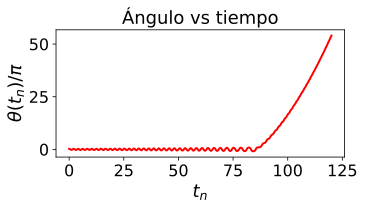

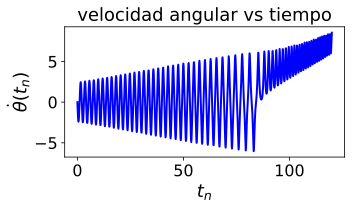

In [98]:
# Graficamos el angulo vs tiempo
fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.plot(tiempo,angulo/np.pi, linestyle='-',linewidth=2,color='red')
plt.xlabel(r"$t_n$",
             fontsize=18, color='black')
plt.ylabel(r"$\theta(t_n)/\pi$",
             fontsize=18, color='black')
plt.title('Ángulo vs tiempo', fontsize=18)
plt.show()

# Graficamos la velocidad angular vs tiempo
fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.plot(tiempo,velocidad, linestyle='-',linewidth=2,color='blue')
plt.xlabel(r"$t_n$",
             fontsize=18, color='black')
plt.ylabel(r"$\dot{\theta}(t_n)$",
             fontsize=18, color='black')
plt.title('velocidad angular vs tiempo', fontsize=18)
plt.show()


### Este problema se puede resolver usando los métodos de integración de Python

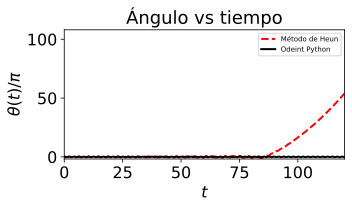

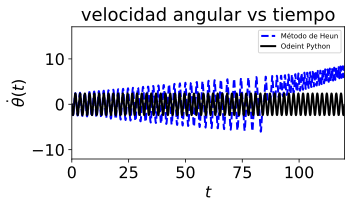

In [99]:
from scipy.integrate import odeint

# Definir la función para la EDO del péndulo simple
def pendulo_simple(x, t, g, L):
    theta, omega = x
    dxdt = [omega, -g/L * np.sin(theta)]
    return dxdt

# Condiciones iniciales
theta0 = np.pi/4     # Ángulo inicial (en radianes)
omega0 = 0           # Velocidad angular inicial

# Vector de tiempo
t = np.linspace(t0, T, N)

# Resolver la EDO utilizando odeint
sol = odeint(pendulo_simple, [theta0, omega0], t, args=(g, L))
theta = sol[:, 0]  # Posiciones angulares
omega = sol[:, 1]  # Velocidades angulares

# Graficamos el angulo vs tiempo
fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.plot(tiempo,angulo/np.pi, linestyle='--',linewidth=2,color='red',label='Método de Heun')
ax.plot(t,theta/np.pi, linestyle='-',linewidth=2,color='black', label='Odeint Python' )
plt.xlabel(r"$t$",
             fontsize=16, color='black')
plt.ylabel(r"$\theta(t)/\pi$",
             fontsize=16, color='black')
plt.title('Ángulo vs tiempo', fontsize=18)
plt.legend(loc='best', fontsize=7)  # Agregar leyenda
plt.xlim(min(tiempo), max(tiempo))
plt.ylim(2*min(min(angulo/np.pi),min(theta/np.pi)), 2*max(max(angulo/np.pi),max(theta/np.pi)))

plt.show()

# Graficamos la velocidad angular vs tiempo
fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.plot(tiempo,velocidad, linestyle='--',linewidth=2,color='blue',label='Método de Heun')
ax.plot(t,omega, linestyle='-',linewidth=2,color='black',label='Odeint Python')
plt.xlabel(r"$t$",
             fontsize=16, color='black')
plt.ylabel(r"$\dot{\theta}(t)$",
             fontsize=16, color='black')
plt.title('velocidad angular vs tiempo', fontsize=18)
plt.legend(loc='best', fontsize=7)  # Agregar leyenda
plt.xlim(min(tiempo), max(tiempo))
plt.ylim(2*min(min(omega),min(velocidad)), 2*max(max(omega),max(velocidad)))
plt.show()

### Calculamos el error cuadrático medio

In [100]:
MSE = np.sum(theta-angulo)**2/len(theta)
print(MSE)

421767.7760658957
